In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cust = pd.read_csv('C:/Users/91639/Documents/My file/Python files/Assignments - Case Studies/Retail Case study/Customer.csv')
cust.head(2)

customer_Id         DOB Gender  city_code
0       268408  02-01-1970      M        4.0
1       269696  07-01-1970      F        8.0

In [3]:
product = pd.read_csv('C:/Users/91639/Documents/My file/Python files/Assignments - Case Studies/Retail Case study/prod_cat_info.csv')
product.head(2)

prod_cat_code  prod_cat  prod_sub_cat_code prod_subcat
0              1  Clothing                  4        Mens
1              1  Clothing                  1       Women

In [4]:
trans = pd.read_csv('C:/Users/91639/Documents/My file/Python files/Assignments - Case Studies/Retail Case study/Transactionss.csv')
trans.head(2)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     29258453508   270384  27-02-2014                 5              3   -5   

   Rate      Tax  total_amt Store_type  
0  -772  405.300  -4265.300     e-Shop  
1 -1497  785.925  -8270.925     e-Shop

#### Q1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [5]:
trans1 = pd.merge(left = trans , right = cust , how = 'inner' , left_on = 'cust_id' , right_on = 'customer_Id')
trans1.head(2)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  20-02-2014                 1              1    5   

   Rate    Tax  total_amt Store_type  customer_Id         DOB Gender  \
0  -772  405.3    -4265.3     e-Shop       270351  26-09-1981      M   
1   772  405.3     4265.3     e-Shop       270351  26-09-1981      M   

   city_code  
0        5.0  
1        5.0

In [6]:
customer_final = pd.merge(left = trans1 , right = product , how = 'inner' , left_on = 'prod_cat_code' , right_on = 'prod_cat_code')
customer_final.head(2)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  28-02-2014                 1              1   -5   

   Rate    Tax  total_amt Store_type  customer_Id         DOB Gender  \
0  -772  405.3    -4265.3     e-Shop       270351  26-09-1981      M   
1  -772  405.3    -4265.3     e-Shop       270351  26-09-1981      M   

   city_code  prod_cat  prod_sub_cat_code prod_subcat  
0        5.0  Clothing                  4        Mens  
1        5.0  Clothing                  1       Women

#### Q2. Prepare a summary report for the merged data set.
     a. Get the column names and their corresponding data types
     b. Top/Bottom 10 observations
     c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
     d. Frequency tables for all the categorical variables

##### a - Get the column names and their corresponding data types

In [7]:
customer_final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

##### b. Top/Bottom 10 observations

In [8]:
customer_final.head(10)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  28-02-2014                 1              1   -5   
2     80712190438   270351  28-02-2014                 1              1   -5   
3     80712190438   270351  20-02-2014                 1              1    5   
4     80712190438   270351  20-02-2014                 1              1    5   
5     80712190438   270351  20-02-2014                 1              1    5   
6     18505840838   271509  16-12-2013                 1              1    3   
7     18505840838   271509  16-12-2013                 1              1    3   
8     18505840838   271509  16-12-2013                 1              1    3   
9     63126920365   271489  22-05-2011                 4              1    4   

   Rate      Tax  total_amt      Store_type  customer_Id         DOB Gender  \
0  -772  405.300  -4265.300          e-Shop       270351  26-09-1981      M   
1  -772  405.300  -4265.300          e-Shop       270351  26-09-1981      M   
2  -772  405.300  -4265.300          e-Shop       270351  26-09-1981      M   
3   772  405.300   4265.300          e-Shop       270351  26-09-1981      M   
4   772  405.300   4265.300          e-Shop       270351  26-09-1981      M   
5   772  405.300   4265.300          e-Shop       270351  26-09-1981      M   
6  1229  387.135   4074.135  Flagship store       271509  08-06-1981      M   
7  1229  387.135   4074.135  Flagship store       271509  08-06-1981      M   
8  1229  387.135   4074.135  Flagship store       271509  08-06-1981      M   
9   131   55.020    579.020        TeleShop       271489  21-04-1971      M   

   city_code  prod_cat  prod_sub_cat_code prod_subcat  
0        5.0  Clothing                  4        Mens  
1        5.0  Clothing                  1       Women  
2        5.0  Clothing                  3        Kids  
3        5.0  Clothing                  4        Mens  
4        5.0  Clothing                  1       Women  
5        5.0  Clothing                  3        Kids  
6        3.0  Clothing                  4        Mens  
7        3.0  Clothing                  1       Women  
8        3.0  Clothing                  3        Kids  
9        9.0  Clothing                  4        Mens

In [9]:
customer_final.tail(10)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
99283     34958490122   266849  20-02-2011                12              6   
99284     34958490122   266849  20-02-2011                12              6   
99285     65823235153   272650  16-02-2011                11              6   
99286     65823235153   272650  16-02-2011                11              6   
99287     65823235153   272650  16-02-2011                11              6   
99288     65823235153   272650  16-02-2011                11              6   
99289     20417144530   269556  29-01-2011                10              6   
99290     20417144530   269556  29-01-2011                10              6   
99291     20417144530   269556  29-01-2011                10              6   
99292     20417144530   269556  29-01-2011                10              6   

       Qty  Rate     Tax  total_amt      Store_type  customer_Id         DOB  \
99283    4  1155  485.10    5105.10          e-Shop       266849  12-10-1979   
99284    4  1155  485.10    5105.10          e-Shop       266849  12-10-1979   
99285    2   358   75.18     791.18          e-Shop       272650  28-02-1990   
99286    2   358   75.18     791.18          e-Shop       272650  28-02-1990   
99287    2   358   75.18     791.18          e-Shop       272650  28-02-1990   
99288    2   358   75.18     791.18          e-Shop       272650  28-02-1990   
99289    3   654  206.01    2168.01  Flagship store       269556  27-12-1972   
99290    3   654  206.01    2168.01  Flagship store       269556  27-12-1972   
99291    3   654  206.01    2168.01  Flagship store       269556  27-12-1972   
99292    3   654  206.01    2168.01  Flagship store       269556  27-12-1972   

      Gender  city_code          prod_cat  prod_sub_cat_code prod_subcat  
99283      M        1.0  Home and kitchen                 11        Bath  
99284      M        1.0  Home and kitchen                 12       Tools  
99285      M        2.0  Home and kitchen                  2  Furnishing  
99286      M        2.0  Home and kitchen                 10     Kitchen  
99287      M        2.0  Home and kitchen                 11        Bath  
99288      M        2.0  Home and kitchen                 12       Tools  
99289      M        5.0  Home and kitchen                  2  Furnishing  
99290      M        5.0  Home and kitchen                 10     Kitchen  
99291      M        5.0  Home and kitchen                 11        Bath  
99292      M        5.0  Home and kitchen                 12       Tools

##### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [10]:
customer_final.describe().tail(5).T

min           25%           50%           75%  \
transaction_id     3268991.000  2.492150e+10  5.011083e+10  7.528121e+10   
cust_id             266783.000  2.689560e+05  2.709820e+05  2.731200e+05   
prod_subcat_code         1.000  4.000000e+00  7.000000e+00  1.000000e+01   
prod_cat_code            1.000  3.000000e+00  5.000000e+00  5.000000e+00   
Qty                     -5.000  1.000000e+00  3.000000e+00  4.000000e+00   
Rate                 -1499.000  3.130000e+02  7.130000e+02  1.109000e+03   
Tax                      7.350  9.828000e+01  1.999200e+02  3.669750e+02   
total_amt            -8270.925  7.624500e+02  1.761370e+03  3.585725e+03   
customer_Id         266783.000  2.689560e+05  2.709820e+05  2.731200e+05   
city_code                1.000  3.000000e+00  5.000000e+00  8.000000e+00   
prod_sub_cat_code        1.000  4.000000e+00  7.000000e+00  1.000000e+01   

                            max  
transaction_id     9.998755e+10  
cust_id            2.752650e+05  
prod_subcat_code   1.200000e+01  
prod_cat_code      6.000000e+00  
Qty                5.000000e+00  
Rate               1.500000e+03  
Tax                7.875000e+02  
total_amt          8.287500e+03  
customer_Id        2.752650e+05  
city_code          1.000000e+01  
prod_sub_cat_code  1.200000e+01

##### d. Frequency tables for all the categorical variable

In [51]:
customer_final.select_dtypes('object').describe()

tran_date Store_type         DOB Gender prod_cat prod_subcat
count        99293      99293       99293  99253    99293       99293
unique        1129          4        3987      2        6          18
top     25-08-2012     e-Shop  27-12-1988      M    Books        Mens
freq           153      40185         156  51051    36414        7957

#### Q3. Generate histograms for all continuous variables and frequency bars for categorical variables

In [13]:
customer_final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [53]:
conti_customer = customer_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]
conti_customer

prod_subcat_code  prod_cat_code  Qty  Rate     Tax  total_amt
0                     1              1   -5  -772  405.30   -4265.30
1                     1              1   -5  -772  405.30   -4265.30
2                     1              1   -5  -772  405.30   -4265.30
3                     1              1    5   772  405.30    4265.30
4                     1              1    5   772  405.30    4265.30
...                 ...            ...  ...   ...     ...        ...
99288                11              6    2   358   75.18     791.18
99289                10              6    3   654  206.01    2168.01
99290                10              6    3   654  206.01    2168.01
99291                10              6    3   654  206.01    2168.01
99292                10              6    3   654  206.01    2168.01

[99293 rows x 6 columns]

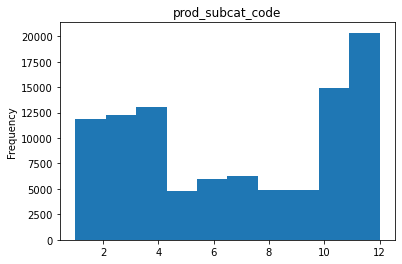

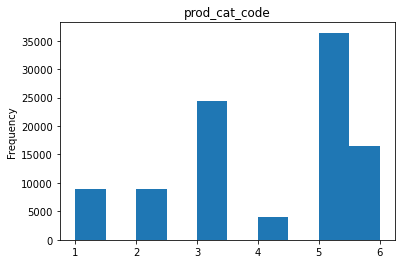

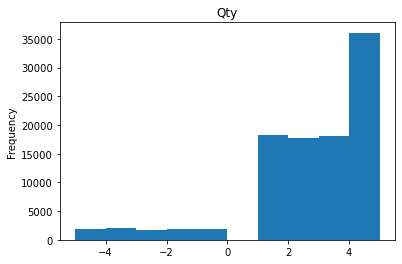

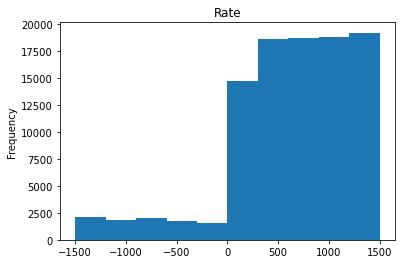

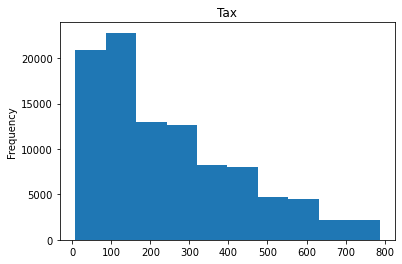

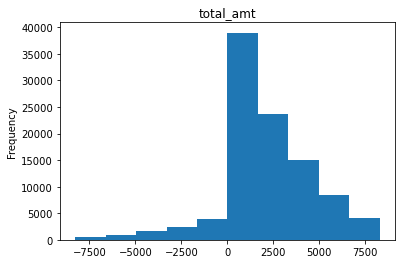

In [56]:
for i in conti_customer.columns:
    conti_customer[i].plot(kind = 'hist')
    plt.title(i)
    plt.show()

In [58]:
# Histogram for total_amt (continuous variable)
category_customer = customer_final.loc[:,customer_final.dtypes=='object']
category_customer.head(4)

tran_date Store_type         DOB Gender  prod_cat prod_subcat
0  28-02-2014     e-Shop  26-09-1981      M  Clothing        Mens
1  28-02-2014     e-Shop  26-09-1981      M  Clothing       Women
2  28-02-2014     e-Shop  26-09-1981      M  Clothing        Kids
3  20-02-2014     e-Shop  26-09-1981      M  Clothing        Mens

<AxesSubplot:xlabel='Gender'>

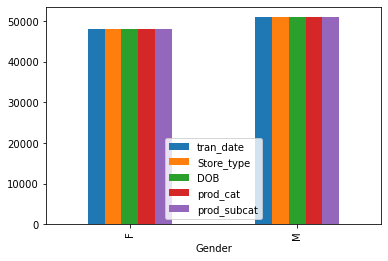

In [62]:
category_customer.groupby(by = 'Gender').count().plot(kind = 'bar')

<AxesSubplot:xlabel='Store_type'>

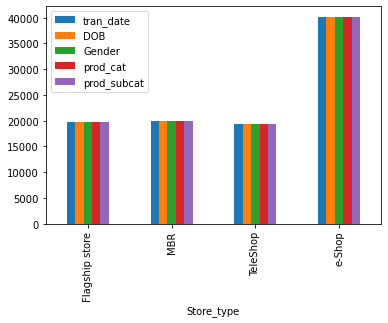

In [63]:
category_customer.groupby(by = 'Store_type').count().plot(kind = 'bar')

<AxesSubplot:xlabel='prod_cat'>

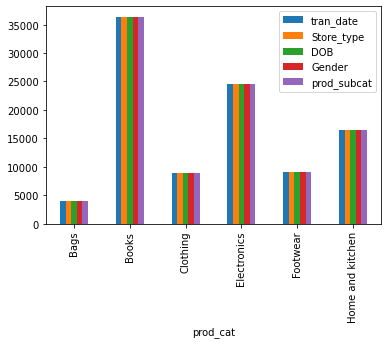

In [64]:
category_customer.groupby(by = 'prod_cat').count().plot(kind = 'bar')

<AxesSubplot:ylabel='prod_subcat'>

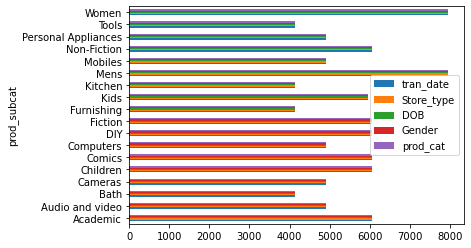

In [65]:
category_customer.groupby(by = 'prod_subcat').count().plot(kind = 'barh')

#### 4. Calculate the following information using the merged dataset :
     a. Time period of the available transaction data
     b. Count of transactions where the total amount of transaction was negative

In [34]:
customer_final.sort_values(by = 'tran_date').head(2)

transaction_id  cust_id tran_date  prod_subcat_code  prod_cat_code  \
44136     41901986246   269269  1-1-2012                 7              5   
19483     66067413087   268571  1-1-2012                 9              3   

       Qty  Rate     Tax  total_amt Store_type  customer_Id         DOB  \
44136    2  1122  235.62    2479.62        MBR       269269  04-02-1981   
19483    2   693  145.53    1531.53     e-Shop       268571  25-05-1982   

      Gender  city_code     prod_cat  prod_sub_cat_code prod_subcat  
44136      M        1.0        Books                  6         DIY  
19483      F        2.0  Electronics                  5   Computers

In [8]:
min_date = customer_final['tran_date'].min()
min_date

'1-1-2012'

In [9]:
max_date = customer_final['tran_date'].max()
max_date

'9-9-2013'

In [10]:
print('The Retail data is from the Period of' , min_date , 'to' , max_date)

The Retail data is from the Period of 1-1-2012 to 9-9-2013


##### b. Count of transactions where the total amount of transaction was negative

In [18]:
customer_final[customer_final.total_amt < 0].total_amt.count()

9294

#### 5. Analyze which product categories are more popular among females vs male customers.

In [26]:
top_cat =customer_final.pivot_table( values = 'total_amt' ,index = 'prod_cat' ,columns = 'Gender' , aggfunc = 'count')
top_cat

Gender                F      M
prod_cat                      
Bags               1988   2008
Books             17694  18696
Clothing           4317   4554
Electronics       11640  12850
Footwear           4587   4407
Home and kitchen   7976   8536

In [33]:
# Most Popular Product categories among MALES AND FEMALES
print(top_cat.sort_values(by = 'F').F.tail(1))
print(top_cat.sort_values(by = 'M').M.tail(1))

prod_cat
Books    17694
Name: F, dtype: int64
prod_cat
Books    18696
Name: M, dtype: int64


#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [37]:
pop_city = customer_final.groupby(by = 'city_code').count()
pop_city

transaction_id  cust_id  tran_date  prod_subcat_code  \
city_code                                                         
1.0                  9717     9717       9717              9717   
2.0                  9843     9843       9843              9843   
3.0                 10467    10467      10467             10467   
4.0                 10571    10571      10571             10571   
5.0                 10116    10116      10116             10116   
6.0                  9130     9130       9130              9130   
7.0                 10258    10258      10258             10258   
8.0                  9965     9965       9965              9965   
9.0                  9214     9214       9214              9214   
10.0                 9976     9976       9976              9976   

           prod_cat_code    Qty   Rate    Tax  total_amt  Store_type  \
city_code                                                              
1.0                 9717   9717   9717   9717       9717        9717   
2.0                 9843   9843   9843   9843       9843        9843   
3.0                10467  10467  10467  10467      10467       10467   
4.0                10571  10571  10571  10571      10571       10571   
5.0                10116  10116  10116  10116      10116       10116   
6.0                 9130   9130   9130   9130       9130        9130   
7.0                10258  10258  10258  10258      10258       10258   
8.0                 9965   9965   9965   9965       9965        9965   
9.0                 9214   9214   9214   9214       9214        9214   
10.0                9976   9976   9976   9976       9976        9976   

           customer_Id    DOB  Gender  prod_cat  prod_sub_cat_code  \
city_code                                                            
1.0               9717   9717    9717      9717               9717   
2.0               9843   9843    9822      9843               9843   
3.0              10467  10467   10467     10467              10467   
4.0              10571  10571   10571     10571              10571   
5.0              10116  10116   10116     10116              10116   
6.0               9130   9130    9111      9130               9130   
7.0              10258  10258   10258     10258              10258   
8.0               9965   9965    9965      9965               9965   
9.0               9214   9214    9214      9214               9214   
10.0              9976   9976    9976      9976               9976   

           prod_subcat  
city_code               
1.0               9717  
2.0               9843  
3.0              10467  
4.0              10571  
5.0              10116  
6.0               9130  
7.0              10258  
8.0               9965  
9.0               9214  
10.0              9976

In [51]:
# This city code has most number of transactions
pop_city.sort_values(by = 'transaction_id' , ascending = False).head(1).index

Float64Index([4.0], dtype='float64', name='city_code')

#### 7. Which store type sells the maximum products by value and by quantity?

In [59]:
top_type = customer_final.groupby(by = 'Store_type')[['total_amt' , 'Qty']].sum()
top_type

total_amt    Qty
Store_type                         
Flagship store  4.188397e+07  48007
MBR             4.170033e+07  48285
TeleShop        4.046656e+07  47339
e-Shop          8.591575e+07  98447

In [70]:
print('This store type has the maximum sales by Value :',top_type.sort_values(by = 'total_amt' , ascending = False).total_amt.head(1))
print('      ')
print('This store has the maximum sales by Qty :',top_type.sort_values(by = 'Qty' , ascending = False).Qty.head(1))

This store type has the maximum sales by Value : Store_type
e-Shop    85915747.84
Name: total_amt, dtype: float64
      
This store has the maximum sales by Qty : Store_type
e-Shop    98447
Name: Qty, dtype: int64


#### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [80]:
customer_final['Profit'] = customer_final.total_amt - customer_final.Tax

In [81]:
flagship_data = customer_final[customer_final['Store_type'] == 'Flagship store']
flagship_data.head(2)

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
6     18505840838   271509  16-12-2013                 1              1    3   
7     18505840838   271509  16-12-2013                 1              1    3   

   Rate      Tax  total_amt      Store_type  customer_Id         DOB Gender  \
6  1229  387.135   4074.135  Flagship store       271509  08-06-1981      M   
7  1229  387.135   4074.135  Flagship store       271509  08-06-1981      M   

   city_code  prod_cat  prod_sub_cat_code prod_subcat  Profit  
6        3.0  Clothing                  4        Mens  3687.0  
7        3.0  Clothing                  1       Women  3687.0

In [83]:
print('Total amount earned by Electronics and Clothing products :',flagship_data.groupby(by = 'prod_cat' ).Profit.sum()[['Electronics' , 'Clothing']])

Total amount earned by Electronics and Clothing products : prod_cat
Electronics    9764423.40
Clothing       3146127.81
Name: Profit, dtype: float64


#### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [88]:
print('Total amount earned through Male customers in Electronics product category :',
      customer_final.pivot_table(index = 'prod_cat' , columns = 'Gender' , values = 'Profit' , aggfunc = 'sum').loc['Electronics','M'])

Total amount earned through Male customers in Electronics product category : 25224154.65


#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [107]:
unq_trans = customer_final[customer_final.total_amt>0].groupby(by = ['customer_Id' , 'prod_cat' , 'prod_subcat']).transaction_id.count().reset_index()
unq_trans

customer_Id          prod_cat  prod_subcat  transaction_id
0           266783             Books     Academic               1
1           266783             Books     Children               1
2           266783             Books       Comics               1
3           266783             Books          DIY               1
4           266783             Books      Fiction               1
...            ...               ...          ...             ...
63033       275265             Books  Non-Fiction               1
63034       275265  Home and kitchen         Bath               1
63035       275265  Home and kitchen   Furnishing               1
63036       275265  Home and kitchen      Kitchen               1
63037       275265  Home and kitchen        Tools               1

[63038 rows x 4 columns]

In [110]:
unq_trans1 = unq_trans.groupby(by = 'customer_Id').transaction_id.count().reset_index()
unq_trans1

customer_Id  transaction_id
0          266783              12
1          266784              11
2          266785              15
3          266788              11
4          266794              19
...           ...             ...
5501       275257              18
5502       275261               8
5503       275262               8
5504       275264              10
5505       275265              12

[5506 rows x 2 columns]

In [111]:
unq_trans1[unq_trans1.transaction_id>10]

customer_Id  transaction_id
0          266783              12
1          266784              11
2          266785              15
3          266788              11
4          266794              19
...           ...             ...
5496       275249              11
5497       275250              11
5499       275252              19
5501       275257              18
5505       275265              12

[3214 rows x 2 columns]

#### 11. For all customers aged between 25 - 35, find out:
         a. What was the total amount spent for “Electronics” and “Books” product categories?
         b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

prod_cat     total_amt
0              Bags  8.249417e+06
1             Books  7.693616e+07
2          Clothing  1.875341e+07
3       Electronics  5.361232e+07
4          Footwear  1.865932e+07
5  Home and kitchen  3.375597e+07

In [143]:
customer_final['DOB'] = pd.to_datetime(customer_final.DOB , format = '%d-%m-%Y')

In [151]:
customer_final['Age'] = (pd.Timestamp.now() - customer_final.DOB).astype('m8[Y]')

In [152]:
customer_final.head()
cust

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  28-02-2014                 1              1   -5   
2     80712190438   270351  28-02-2014                 1              1   -5   
3     80712190438   270351  20-02-2014                 1              1    5   
4     80712190438   270351  20-02-2014                 1              1    5   

   Rate    Tax  total_amt Store_type  customer_Id        DOB Gender  \
0  -772  405.3    -4265.3     e-Shop       270351 1981-09-26      M   
1  -772  405.3    -4265.3     e-Shop       270351 1981-09-26      M   
2  -772  405.3    -4265.3     e-Shop       270351 1981-09-26      M   
3   772  405.3     4265.3     e-Shop       270351 1981-09-26      M   
4   772  405.3     4265.3     e-Shop       270351 1981-09-26      M   

   city_code  prod_cat  prod_sub_cat_code prod_subcat  Profit   Age  
0        5.0  Clothing                  4        Mens -4670.6  41.0  
1        5.0  Clothing                  1       Women -4670.6  41.0  
2        5.0  Clothing                  3        Kids -4670.6  41.0  
3        5.0  Clothing                  4        Mens  3860.0  41.0  
4        5.0  Clothing                  1       Women  3860.0  41.0

In [178]:
customer_final['Age_cat'] = pd.cut(customer_final.Age ,bins = (24,35,46,57) ,labels = ['25-35' , '36-46' , '47-57'] , include_lowest = True)

In [179]:
customer_final.head()

transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  28-02-2014                 1              1   -5   
2     80712190438   270351  28-02-2014                 1              1   -5   
3     80712190438   270351  20-02-2014                 1              1    5   
4     80712190438   270351  20-02-2014                 1              1    5   

   Rate    Tax  total_amt Store_type  customer_Id        DOB Gender  \
0  -772  405.3    -4265.3     e-Shop       270351 1981-09-26      M   
1  -772  405.3    -4265.3     e-Shop       270351 1981-09-26      M   
2  -772  405.3    -4265.3     e-Shop       270351 1981-09-26      M   
3   772  405.3     4265.3     e-Shop       270351 1981-09-26      M   
4   772  405.3     4265.3     e-Shop       270351 1981-09-26      M   

   city_code  prod_cat  prod_sub_cat_code prod_subcat  Profit   Age Age_cat  
0        5.0  Clothing                  4        Mens -4670.6  41.0   36-46  
1        5.0  Clothing                  1       Women -4670.6  41.0   36-46  
2        5.0  Clothing                  3        Kids -4670.6  41.0   36-46  
3        5.0  Clothing                  4        Mens  3860.0  41.0   36-46  
4        5.0  Clothing                  1       Women  3860.0  41.0   36-46

In [180]:
cust_age = customer_final.groupby(by = ['Age_cat','prod_cat']).total_amt.sum()
cust_age

Age_cat  prod_cat        
25-35    Bags                2.121167e+06
         Books               1.952741e+07
         Clothing            5.550046e+06
         Electronics         1.474082e+07
         Footwear            5.284050e+06
         Home and kitchen    9.419864e+06
36-46    Bags                3.910328e+06
         Books               3.747041e+07
         Clothing            8.792298e+06
         Electronics         2.486797e+07
         Footwear            8.751457e+06
         Home and kitchen    1.605957e+07
47-57    Bags                2.217923e+06
         Books               1.993835e+07
         Clothing            4.411068e+06
         Electronics         1.400353e+07
         Footwear            4.623815e+06
         Home and kitchen    8.276543e+06
Name: total_amt, dtype: float64

In [181]:
cust_age.loc['25-35' , ['Electronics' , 'Books']]

Age_cat  prod_cat   
25-35    Electronics    1.474082e+07
         Books          1.952741e+07
Name: total_amt, dtype: float64

#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [186]:
cust_age_25_35 = customer_final[customer_final.Age_cat == '25-35']
cust_age_25_35.head()

transaction_id  cust_id tran_date  prod_subcat_code  prod_cat_code  Qty  \
42     31995208412   268509  1-8-2013                 4              1    5   
43     31995208412   268509  1-8-2013                 4              1    5   
44     31995208412   268509  1-8-2013                 4              1    5   
45     43469248603   268444  6-1-2012                 4              1    2   
46     43469248603   268444  6-1-2012                 4              1    2   

    Rate     Tax  total_amt Store_type  customer_Id        DOB Gender  \
42   938  492.45    5182.45   TeleShop       268509 1989-08-17      M   
43   938  492.45    5182.45   TeleShop       268509 1989-08-17      M   
44   938  492.45    5182.45   TeleShop       268509 1989-08-17      M   
45   403   84.63     890.63        MBR       268444 1992-01-02      F   
46   403   84.63     890.63        MBR       268444 1992-01-02      F   

    city_code  prod_cat  prod_sub_cat_code prod_subcat  Profit   Age Age_cat  
42       10.0  Clothing                  4        Mens  4690.0  33.0   25-35  
43       10.0  Clothing                  1       Women  4690.0  33.0   25-35  
44       10.0  Clothing                  3        Kids  4690.0  33.0   25-35  
45        6.0  Clothing                  4        Mens   806.0  30.0   25-35  
46        6.0  Clothing                  1       Women   806.0  30.0   25-35

In [194]:
cust_age_25_35[(cust_age_25_35.tran_date >= '1-1-2014') & (cust_age_25_35.tran_date <= '1-3-2014')].total_amt.sum()

847579.2